# Моделирование по физике №2; Макаров Денис Иванович M3301

# Условие

На основании модели Кронига-Пени промоделировать зонную структуру одномерного кристалла. Проанализировать изменение ширины запрещенных зон для двух крайних случаев, когда электрон совершенно свободен и когда электрон заперт внутри одной потенциальной ямы, т.е. стенки непроницаемы, а так же промежуточные случаи. 

$$V(x)=\left \{
    \begin{array}{ll}
    0 \textrm{,} & nc < x < nc + a \textrm{,} \\
    V_0 \textrm{,} & (nc + a) < x < (n + 1)c.
    \end{array}
    \right., где \ a - ширина \ ямы, \\ b - ширина \ барьера, \ c - постоянная \ кристалической \ решетки \ c = a + b, \\ n = 0, \ \pm 1, \ \pm 2, ...  \ .$$


# Решение

Расчеты электронных состояний в полупроводниковых наноструктурах, выполняемые в методе эффективной массы, основаны на решении стационарного уравнения Шредингера, которое для движения электронов в перпендикулярном плоскости слоёв направлении является одномерным. Требуется промоделировать энергетический спектр электрона в кристалле по заданной формуле выше.

Решение уравнения Шредингера при $E < V_0$ будет:

$$\Psi_{n}(x) = \left \{
\begin{array}{ll}
A_n e^{j \alpha(x - nc)} + B_n e^{-j \alpha (x - nc)} \textrm{,} & если  \ nc < x < nc + a \\
C_n e^{\beta[x - (nc + a)]} + D_n e^{- \beta[x - (nc + a)]} \textrm{,} & если \ (nc + a) < x < (n + 1)c.
\end{array}
\right .$$

$$\alpha = {{1}\over{\hbar}} \sqrt{2m_nE}$$

$$\beta = {{1}\over{\hbar}} \sqrt{2m_n (U - E)}$$

Далее, оттуда из граничных получаем систему из четырех уравнений:

$$ A_n + B_n = C_{n-1} e^{\beta b} + D_{n-1} e^{- \beta b}$$
$$ j \alpha A_n - j \alpha B_n = C_{n-1} \beta e^{\beta b} - D_n \beta e^{- \beta b}$$
$$ A_n e^{j a \alpha} + B_n e^{-j a \alpha} = C_n + D_n$$
$$ j \alpha A_n e^{j a \alpha} - j \alpha B_n e^{-j \alpha a} = \beta C_n - \beta D_n$$


Так как функции $\psi_{n_1}$ и $\psi_{n}$ являются решениями одного и того же уравнения
Шредингера, то они могут отличаться друг от друга только постоянным
множителем, квадрат которого равен единице. То есть:
$$\psi_{n} = \psi_{n-1} e^{j \lambda}$$
где $\lambda$ — некоторый вещественный параметр.

Отсюда:
$$ C_{n-1} = C_n e^{-j \lambda}$$
$$D_{n-1} = D_n e^{-j \lambda}$$

Подставляя их в уравнение выше, получаем систему из четырех уравнений с 4 неизвестными. Чтобы данная система уравнений имела нетривиальное решение, необходимо, чтобы определитель, составленный из коэффициентов, не был равен нулю.

Записав и раскрыв определитель, получим уравнение, определяющее значения энергии электрона $E$ (входящей в выражения для $\alpha$ и $\beta$), для которых существуют нетривиальные решения системы:

$$cos( \alpha a) \cdot ch(\beta b) + {{ \beta^2 - \alpha^2}\over{2 \alpha \beta}} \cdot \sin(\alpha a) \cdot sh(\beta b) = cos(\lambda)$$

Анализ уравнения затруднен тем, что энергия входит в $\alpha$ и $\beta$, однако его можно упростить, представив потенциал в ещё более идеализированном виде. Произведение $b \cdot \beta$ определяет степень прозрачности потенциального барьера для электронов, в него входит ширина барьера $b$ и высота барьера $V_0$. Рассмотрим случай, когда ширина барьера устремляется к нулю  а высота — к бесконечности, причем так, что произведение $V_0 b = const$. При этом, так как $U_0 ~ \beta^2$ , то при $b \rightarrow 0$ и $U_0 \rightarrow \inf$ произведение $b \beta \rightarrow 0$. Тогда, вводя обозначение
$$ P = \lim_{b \rightarrow 0, V_0 \rightarrow \inf, V_0 b = const} \frac{\beta^2 ab}{2} $$
от уравнения выше перейдем к более простому:
$$ cos(a \alpha) + P \frac{sin(a \alpha)}{a \alpha} = cos(\lambda)$$

Уравнение называется уравнением Кронига–Пенни. Параметр $P$
пропорционален площади потенциального барьера; он характеризует степень прозрачности барьера для электронов или степень связанности электрона внутри потенциальной ямы.

Для анализа уравнения изобразим графически его левую часть
как функцию аргумента $a \alpha$. Действительные
корни этого уравнения существуют только при тех значениях $a \alpha$, при которых левая часть уравнения принимает значения в интервале $[-1; 1]$
___
[Использованная литература (всё оттуда)](https://old.sgu.ru/sites/default/files/textdocsfiles/2014/01/10/modelirovanie_nanostruktur_2013.pdf)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json

def load_parameters(json_file):
    with open(json_file, 'r') as file:
        return json.load(file)

def get_function_zones(a_alpha, P):
    return np.cos(a_alpha) + P * np.sin(a_alpha) / a_alpha

def plot_kronig_penney(P, a_alpha_range):
    a_alpha = np.linspace(*a_alpha_range, 10000)
    y = get_function_zones(a_alpha, P)

    plt.figure(figsize=(10, 6))
    plt.plot(a_alpha, y, label=r'$P = {}$'.format(P), color='r')

    plt.axhline(1, color='k', linestyle='--')
    plt.axhline(-1, color='k', linestyle='--')

    plt.fill_between(a_alpha, 1, -1, where=(np.abs(y) < 1), color='yellow', alpha=0.3, label='Allowed Zones')

    plt.xlabel(r'$a \cdot \alpha$')
    plt.ylabel(r'$\cos(a \cdot \alpha) + P \cdot \frac{\sin(a \cdot \alpha)}{a \cdot \alpha}$')
    plt.title('Graphical Analysis of the Kronig-Penney Equation')
    plt.legend()
    plt.grid(True)
    plt.show()

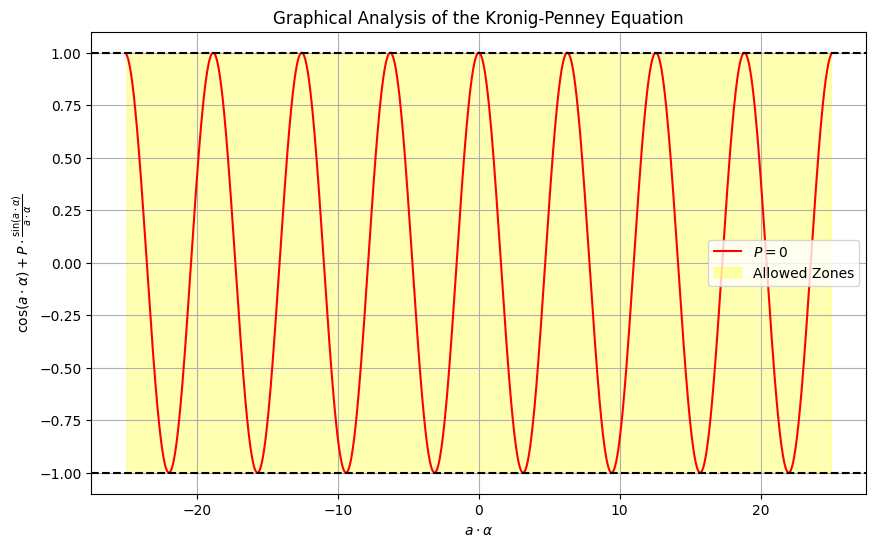

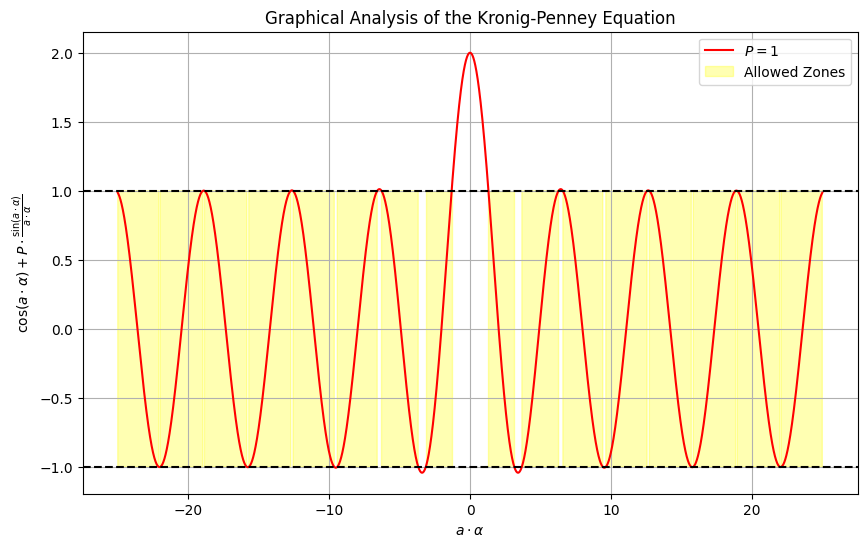

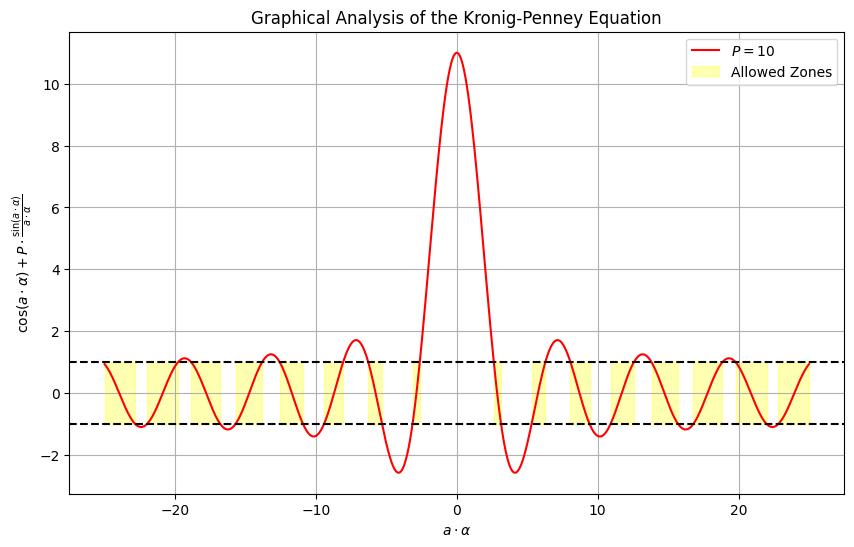

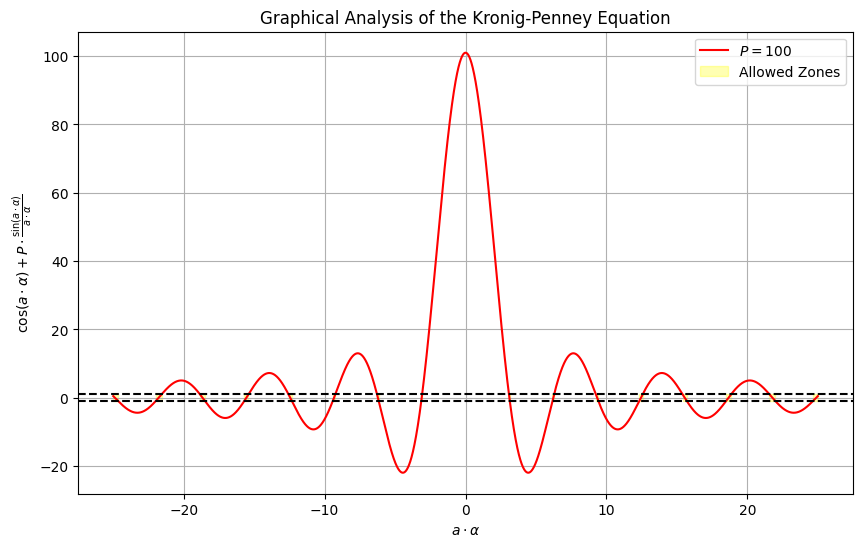

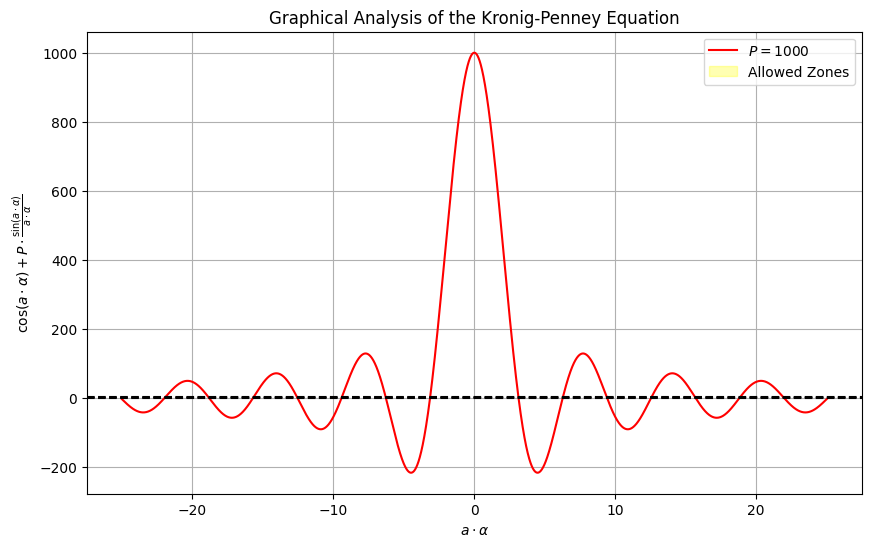

In [8]:
params = load_parameters('cfg.json')

P_values = params['P_values']
a_alpha_range = params['a_alpha_range']

for P in P_values:
    plot_kronig_penney(P, a_alpha_range)

# Вывод
Вспомним, что $P$ показывает степень прозрачности барьера и пропорционален $V_0$. Соответственно, нулем он может быть лишь тогда, когда электрон совершенно свободен. Видимо, что в таком случае, запрещенных зон нет.
А также в противном случае, если электрон полностью заперт в яме, то разрешенных зон нет.
В граничных случаях имеются. Но чем больше $P$, тем их меньше.

# Численное решение для подкрепления вывода

Используем `Finite Diff Method (FDM)`.

### Приближение конечных разностей

Вторая производная от волновой функции $\psi(x)$ аппроксимируется с помощью центральных конечных разностей:

$$\dfrac{d^2 \psi}{dx^2} \bigg|_{x_i} \approx \dfrac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{(\Delta x)^2}$$

### Учет периодических граничных условий

Поскольку потенциал и система периодичны, мы применяем **периодические граничные условия с фазовым множителем**(условия Блоха):

$$\psi_{i+N} = \psi_i e^{i k c}$$

где $k$ — квази-импульс (волновой вектор) электрона, $c$ — период потенциала.

### Построение матрицы Гамильтониана

Используя приближение конечных разностей, уравнение Шрёдингера в точке $x_i$ принимает вид:

$$\dfrac{\hbar^2}{2m_e} \dfrac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{(\Delta x)^2} + V_i \psi_i = E \psi_i$$

Это можно переписать как:
$$t \psi_{i-1} + (2t + V_i) \psi_i - t \psi_{i+1} = E \psi_i$$

где мы ввели параметр:

$$t = \dfrac{\hbar^2}{2m_e (\Delta x)^2}$$

Таким образом, матрица Гамильтониана $H$ имеет следующую структуру:

- **Диагональные элементы**: $H_{i,i} = 2t + V_i$
- **Внедиагональные элементы**: $H_{i,i+1} = H_{i+1,i} = -t$
- **Граничные элементы** с учетом периодических граничных условий: $H_{0,N-1} = H_{N-1,0} = -t \times e^{-i k c}$

### Получение энергий

После построения матрицы H решается **задача нахождения собственных значений**:
$$H \Psi = E \Psi$$

Где:

- $\Psi = (\psi_0, \psi_1, \dots, \psi_{N-1})^T$ — собственный вектор (дискретизированная волновая функция).
- $E$ — собственное значение (энергия электрона при данном $k$).

C:\Users\raybe\AppData\Local\Temp\ipykernel_9092\1821232197.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  H[0, -1] = H[-1, 0] = - (hbar**2) / (m_e * dx**2) * phase_factor


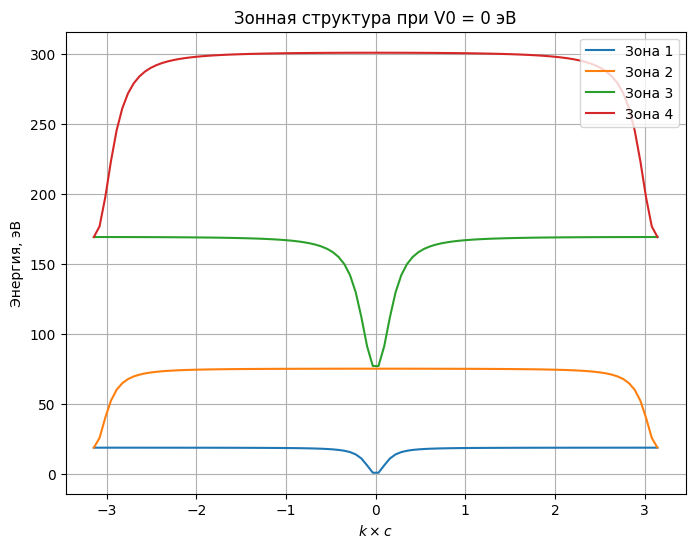

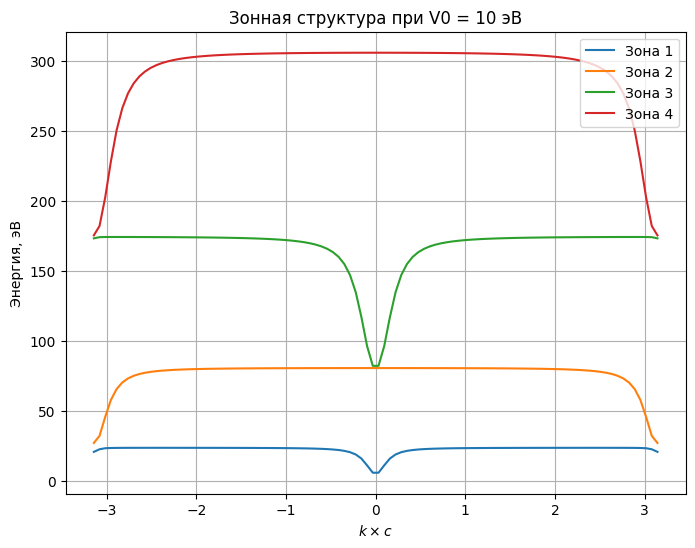

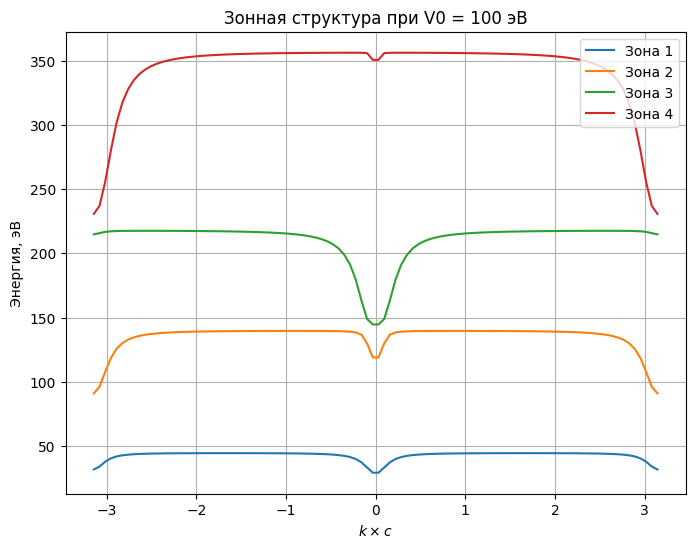

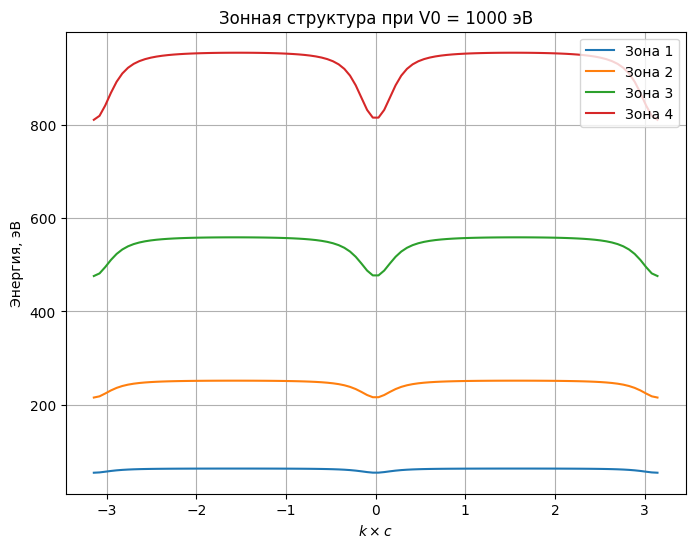

In [1]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.0545718e-34
m_e = 9.10938356e-31
eV = 1.602176634e-19

a = 1e-10
b = 1e-10
c = a + b

V0_values = [0, 10*eV, 100*eV, 1000*eV]

N = 500  # Число точек
x = np.linspace(0, c, N, endpoint=False)
dx = x[1] - x[0]

def potential(x, V0):
    V = np.zeros_like(x)
    V[(x >= a) & (x < c)] = V0
    return V

def build_hamiltonian(V, k):
    diagonal = (2 * hbar**2) / (m_e * dx**2) + V
    off_diagonal = - (hbar**2) / (m_e * dx**2) * np.ones(N - 1)
    H = np.diag(diagonal) + np.diag(off_diagonal, 1) + np.diag(off_diagonal, -1)
    # Периодические граничные условия с учетом квазиимпульса k
    phase_factor = np.exp(-1j * k * c)
    H[0, -1] = H[-1, 0] = - (hbar**2) / (m_e * dx**2) * phase_factor
    return H

def compute_and_plot_band_structure(V0):
    V = potential(x, V0)
    k_values = np.linspace(-np.pi / c, np.pi / c, 100)
    energies = []

    for k in k_values:
        H = build_hamiltonian(V, k)
        E = np.linalg.eigvalsh(H)
        energies.append(E)

    energies = np.array(energies) / eV

    plt.figure(figsize=(8,6))
    num_bands = 4
    for n in range(num_bands):
        plt.plot(k_values * c, energies[:, n], label=f'Зона {n+1}')
    plt.title(f'Зонная структура при V0 = {V0 / eV:.0f} эВ')
    plt.xlabel(r'$k \times c$')
    plt.ylabel('Энергия, эВ')
    plt.legend()
    plt.grid(True)
    plt.show()

for V0 in V0_values:
    compute_and_plot_band_structure(V0)